<a href="https://colab.research.google.com/github/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC3000 Lab SCS7 Assignment 1

## Contributors
#### Soh Zi Xiang (U2321798D) - Contributed setting up env and exploring Q-learning model 

#### Lee Yong Arn (U2322767L) - Development of PPO Agent & concluding comparison between models


#### General References:
Initial setup: https://github.com/yue-zhongqi/cartpole_colab 

SC3000 Content: https://ntulearn.ntu.edu.sg/ultra 

## Importing dependencies and define helper functions

Before proceeding, ensure you have all the required libraries installed. For this lab ****Gym Version: 0.26.2****  and  ****Numpy Version: 1.23.5**** was used, which may not be compatible with other versions. You may use the following pip install commands for installation

In [1]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

Python: 3.11.4
NumPy: 1.23.5
TensorFlow: 2.18.0
Gym: 0.26.2


## Setting up & loading CartPole environment

In [2]:
env = gym.make("CartPole-v1")
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


## Development of an RL agent

### Q-Learning Model

We will first try a Q-learning model as taught in the lectures
- Using an ε-greedy strategy for action selection.
- The Epsilon value (ε) will control exploration vs. exploitation.
- As training progresses, ε decreases, making the agent rely more on learned Q-values.

#### Q-Learning Update Equation:
The core of the Q-learning algorithm is the update rule for the Q-values, which estimate the expected future rewards for state-action pairs. 

#### Q(s,a)←Q(s,a)+α[r+γmax​Q(s′,a′)−Q(s,a)]
 
#### References: 

Basic setup and modified for own use: https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df

## Key Updates to the Original Code

1. **Reduced Number of Episodes**:  
   The number of training episodes was reduced from 60,000 to 20,000, with no loss in efficiency, as the agent still converges effectively in fewer episodes. To compensate for this, the learning rate was increased to help the agent learn faster.

2. **Learning Rate**:  
   The learning rate (`ALPHA`) was increased from 0.1 to 0.2, which helps the agent adjust the Q-values more quickly, resulting in faster convergence.

3. **State Discretization**:  
   The `get_discrete_state` function was updated to ensure indices stay within valid ranges using `np.clip`, making the Q-table lookups more stable and preventing errors.

4. **Updated Environment Handling**:  
   Newer versions of OpenAI Gym return additional information. The code was adjusted to unpack the necessary state using `env.reset()[0]` and handle the `terminated` and `truncated` flags.


6. **Epsilon Decay**:  
   Exploration starts with a high epsilon value (1.0) and decays over time, allowing the agent to transition from exploration to exploitation. Decay rate is slow, maintaining a balance between exploration and exploitation.

## Learning Strategy

- **Early Episodes**: Focus on exploration, where the agent tries random actions to gather diverse experiences.
- **Later Episodes**: As the agent learns, it starts relying more on its knowledge (exploitation), choosing actions that yield higher expected rewards.
- **Balancing Exploration and Exploitation**: Exploration is high initially and decays over time to allow for more effective exploitation.
   
## Reward Shaping for Balancing the Pole

In addition to the standard reward of +1 for each time step the agent stays alive, a bonus reward is added to encourage the agent to balance the pole. The reward is based on the angle of the pole, where the closer the pole is to vertical (zero angle), the higher the reward. This bonus encourages the agent to focus on maintaining balance. 

The modified reward is calculated as follows:
- **Standard reward**: +1 for each time step.
- **Balance reward**: A bonus is added, calculated by:
  $$ \text{Reward} = \text{Reward} + 0.1 \times (1 - |\text{Pole Angle}| / 0.2095) $$

This formula ensures that as the pole's angle becomes smaller (closer to vertical), the agent is rewarded more.


Episode: 0, Avg Reward: 54.29, Best: 54.29393273653232, Epsilon: 0.9999
Episode: 100, Avg Reward: 23.68, Best: 80.26121876269201, Epsilon: 0.9900
Episode: 200, Avg Reward: 25.15, Best: 104.64098685444434, Epsilon: 0.9801
Episode: 300, Avg Reward: 25.50, Best: 112.78013463621193, Epsilon: 0.9703
Episode: 400, Avg Reward: 27.14, Best: 112.78013463621193, Epsilon: 0.9607
Episode: 500, Avg Reward: 24.54, Best: 112.78013463621193, Epsilon: 0.9511
Episode: 600, Avg Reward: 23.33, Best: 112.78013463621193, Epsilon: 0.9417
Episode: 700, Avg Reward: 25.39, Best: 112.78013463621193, Epsilon: 0.9323
Episode: 800, Avg Reward: 25.04, Best: 112.78013463621193, Epsilon: 0.9230
Episode: 900, Avg Reward: 26.69, Best: 112.78013463621193, Epsilon: 0.9138
Episode: 1000, Avg Reward: 27.18, Best: 112.78013463621193, Epsilon: 0.9047
Episode: 1100, Avg Reward: 26.67, Best: 112.78013463621193, Epsilon: 0.8957
Episode: 1200, Avg Reward: 30.41, Best: 112.78013463621193, Epsilon: 0.8868
Episode: 1300, Avg Reward:

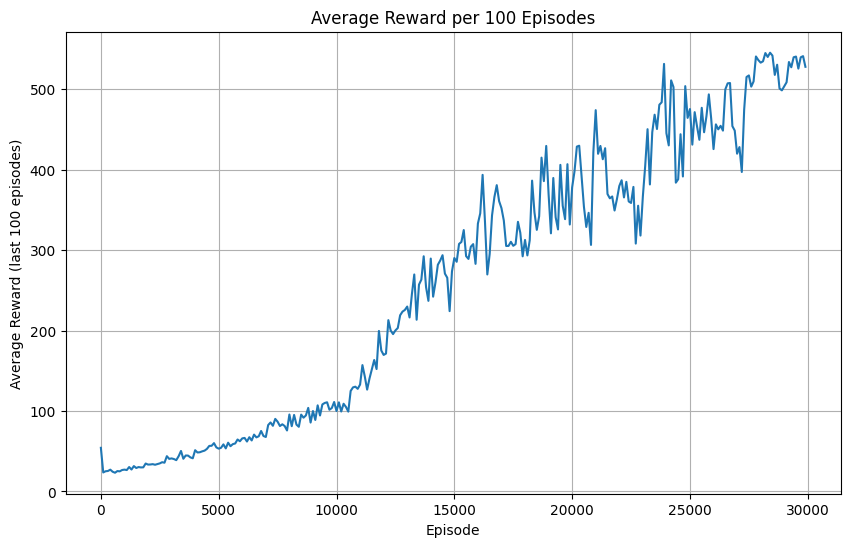

In [3]:
# Hyperparameters
ALPHA = 0.2         # learning rate 
GAMMA = 0.99        # Discount factor
EPSILON = 1.0       
MIN_EPSILON = 0.01  
EPSILON_DECAY = 0.9999 
EPISODES = 30000   

# Discretization (finer bins + dynamic ranges)
BINS = [
    np.linspace(-2.4, 2.4, 20),       # Cart position (20 bins)
    np.linspace(-4.0, 4.0, 20),       # Cart velocity
    np.linspace(-0.2095, 0.2095, 20), # Pole angle 
    np.linspace(-4.0, 4.0, 20)        # Pole velocity
]

# Initialize Q-table with optimistic values
q_table = np.random.uniform(low=0, high=1, size=([len(bin) for bin in BINS] + [2]))

def get_discrete_state(state):
    """Convert continuous state to discrete indices with clipping"""
    clipped_state = np.clip(state, [
        BINS[0][0], BINS[1][0], BINS[2][0], BINS[3][0]
    ], [
        BINS[0][-1], BINS[1][-1], BINS[2][-1], BINS[3][-1]
    ])
    return tuple(np.digitize(clipped_state[i], BINS[i]) - 1 for i in range(4))

# Training
env = gym.make('CartPole-v1')
rewards = []
best_reward = 0
avg_rewards = []

for episode in range(EPISODES):
    state = env.reset()[0]
    discrete_state = get_discrete_state(state)
    done = False
    total_reward = 0
    
    while not done:
        # Epsilon-greedy action
        if np.random.random() < EPSILON:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[discrete_state])  # Exploit
        
        # Step
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        new_discrete_state = get_discrete_state(new_state)
        
        # Q-learning update (with reward shaping)
        reward = reward + 0.1 * (1 - abs(new_state[2]) / 0.2095)  # Bonus for balancing
        
        max_future_q = np.max(q_table[new_discrete_state])
        current_q = q_table[discrete_state][action]
        new_q = current_q + ALPHA * (reward + GAMMA * max_future_q - current_q)
        q_table[discrete_state][action] = new_q
        
        discrete_state = new_discrete_state
        total_reward += reward
    
    # Decay epsilon (slower decay)
    EPSILON = max(MIN_EPSILON, EPSILON * EPSILON_DECAY)
    rewards.append(total_reward)
    
    # Track best performance
    if total_reward > best_reward:
        best_reward = total_reward
    
    # Track average reward every 100 episodes
    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_rewards.append(avg_reward)
        print(f"Episode: {episode}, Avg Reward: {avg_reward:.2f}, Best: {best_reward}, Epsilon: {EPSILON:.4f}")

# Plotting the average reward every 100 episodes
plt.figure(figsize=(10, 6))
plt.plot(range(0, EPISODES, 100), avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward (last 100 episodes)')
plt.title('Average Reward per 100 Episodes')
plt.grid(True)
plt.show()


## Task 1:  Show the observation and chosen action below:

In [4]:
# Test the trained model
state = env.reset()[0]
print("Observation space is:", state)

discrete_state = get_discrete_state(state)
chosen_action = np.argmax(q_table[discrete_state])
print("Action chosen:", chosen_action)

Observation space is: [ 0.01610394  0.04198268 -0.00877447 -0.03994396]
Action chosen: 1


Deep-Q

References:
https://github.com/microsoft/AI-For-Beginners/blob/main/lessons/6-Other/22-DeepRL/CartPole-RL-PyTorch.ipynb



## Task 2: Demonstrate the effectiveness of the RL agent

### Q-Learning Model

In this task, we will evaluate the performance of our trained agent. 

We will first: 
1. **Run the trained model for 100 episodes**:
   - At the start of each episode, the environment will be reset to ensure independent evaluation.
   - The agent will use its learned Q-values to select the best action at each step.

2. **Plot Cumulative Rewards**:
   - For each episode, the cumulative reward (total reward collected during the episode) will be recorded.
   - A line graph will display the cumulative reward for all 100 episodes.

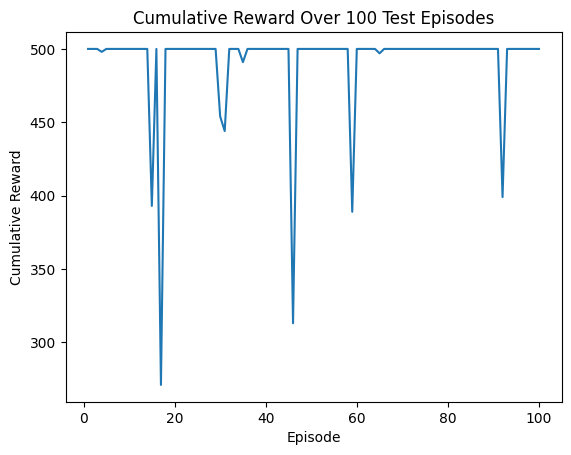

In [5]:
test_episodes = 100
cumulative_rewards = []
total_reward = 0

# Run the trained model for 100 episodes
for episode in range(test_episodes):
    state = env.reset()[0]  
    discrete_state = get_discrete_state(state)
    done = False
    episode_reward = 0

    while not done:
        action = np.argmax(q_table[discrete_state])

        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        episode_reward += reward

        # Transition to the new state
        discrete_state = get_discrete_state(new_state)

    cumulative_rewards.append(episode_reward)  
    total_reward += episode_reward

plt.plot(range(1, test_episodes + 1), cumulative_rewards)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over 100 Test Episodes")
plt.show()

Next we will:

3. **Compute the Average Reward**:
   - The average reward over the 100 test episodes will be printed.
   - To test the agent's effectiveness, the **average reward should exceed 195** and be evaluated accordingly.

In [6]:
average_reward = total_reward / test_episodes
print(f"Average Reward over {test_episodes} episodes: {average_reward}")
if average_reward >= 195:
    print("The agent is performing effectively.")
else:
    print("The agent's performance is below the expected average.")

Average Reward over 100 episodes: 491.49
The agent is performing effectively.


## Task 3: Render One Episode Played by the RL Agent

To demonstrate the performance of the trained reinforcement learning agent, we will render one episode and save the video. For this task, we made adjustments to the environment setup to ensure proper video recording and rendering:

- **Adjusted Code for Recording**:
  - Used `render_mode="rgb_array"` to fix rendering issues.
  - Added `episode_trigger=lambda episode_id: True` to save every episode's video.


In [7]:
# Set up the environment to record the video without rendering
env = RecordVideo(gym.make("CartPole-v1", render_mode="rgb_array"), "./video")

# Reset the environment and get the initial observation
state = env.reset()[0]
discrete_state = get_discrete_state(state)
done = False
episode_reward = 0

# Run one episode of the trained RL agent
while not done:
    action = np.argmax(q_table[discrete_state])

    # Perform step and unpack results
    new_state, reward, terminated, truncated, info = env.step(action)
    done = bool(terminated or truncated)
    
    episode_reward += reward
    
    discrete_state = get_discrete_state(new_state)

env.close()
show_video()
print("Episode reward:", episode_reward)

MoviePy - Building video D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4.
MoviePy - Writing video D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4


Episode reward: 500.0


## Analysis of Results

### Evaluation of the RL Agent:
- **Average Reward over 100 Episodes**:  
  The model achieved an average reward of **491.49**, demonstrating that it is possible to solve the CartPole environment effectively using the Q-learning algorithm when tuned appropriately. With that said, it may require multiple tries to obtain such a high-performing model as the training process is influenced by factors like random initialization and exploration strategies.

- **Performance in Rendered Episode**:  
  In the rendered episode, the agent achieved a reward of **500.0**, proving that it can perform optimally once well-trained. This indicates that with sufficient training and tuning, the agent is capable of balancing the pole for the maximum time possible.

### Conclusion:
The results highlight both the advantages and disadvantages of employing the Q-learning technique to solve the CartPole problem. While the technique is highly skilled when well-tuned, it can take repeating the training process some number of times due to reinforcement learning's inherent stochasticity in order to get such a model. The findings highlight the importance of parameter tuning, exploration-exploitation tradeoffs, and careful experimentation to success in reinforcement learning competitions.

## Development of Proximal Policy Optimization (PPO) Agent

We have also implemented a Proximal Policy Optimization (PPO) agent to solve the Cart Pole Problem using Stable-Baselines3.

**What is PPO?**

Proximal Policy Optimization (PPO) is a reinforcement learning (RL) algorithm that belongs to the family of policy-gradient methods. It is widely used for training intelligent agents in environments with discrete or continuous action spaces. PPO is particularly favored for its simplicity, stability, and efficiency compared to other RL algorithms like Trust Region Policy Optimization (TRPO). Below are the key components and mechanisms of PPO:

**Key Components of PPO**
1. Actor-Critic Framework:
  - Actor: Executes the policy, determining the action to take based on the current state. It is implemented as a neural network that outputs probabilities for actions.
  - Critic: Evaluates the policy by estimating the value of a given state. This value function critic helps guide the actor by providing feedback on how well its actions align with expected rewards.
2. Advantage Function:
  - The advantage function measures how much better or worse a specific action is compared to the baseline (expected return). It is calculated as:
    
          A(s,a)=R(s,a)−V(s)
          
  Here,
R
(
s
,
a
)
R(s,a) is the actual return from taking action
a
a in state
s, and
V(s) is the baseline estimate provided by the critic.

3. Clipped Surrogate Objective Function:
  - PPO uses a clipping mechanism to limit how much the policy can change during each update. This prevents overly large updates that could destabilize training.
  - The objective function incorporates a ratio between the new policy and the old policy probabilities:
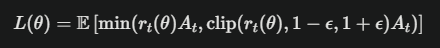
                      
    where rt(θ) is the probability ratio, and ϵ is a hyperparameter controlling the clipping range.

4. Entropy Bonus:
  - An entropy term is added to encourage exploration by introducing randomness in action selection. This helps balance exploration and exploitation during training.




**Advantages of PPO**
1. Training Stability:
  - The clipping mechanism ensures smooth updates to the policy, avoiding drastic changes that could lead to instability.
2. Ease of Implementation:
  - PPO does not require second-order optimization techniques like TRPO, making it simpler and less computationally expensive.
3. Sample Efficiency:
  - By reusing collected data effectively, PPO achieves good performance with fewer samples compared to other RL algorithms.



**Comparison with Q-Learning**
  - Q-Learning relies on discretizing state-action spaces and updating Q-values iteratively using a table or function approximator. PPO, on the other hand, directly optimizes policies using neural networks without discretization.

  - PPO handles continuous state and action spaces more effectively than Q-Learning.

## Task 1:  Show the observation and chosen action below:

**Objective: Train a PPO agent and demonstrate action selection on a sample state.**
1. Environment Setup:
  - Created a vectorized CartPole-v1 environment using make_vec_env from Stable-Baselines3 for efficient training.
  - The environment is compatible with Gymnasium's API, which requires unpacking env.reset() to (obs, info).
2. PPO Agent Training:
  - Defined and trained a PPO agent using the MlpPolicy (multi-layer perceptron) architecture.
  - Training was performed for 100,000 timesteps to ensure convergence.
3. Action Prediction:
  - Sampled a random state from the environment.
  - Used the trained PPO model to predict an action deterministically.

**Output**
- Displays the sampled state and the corresponding action chosen by the PPO agent.



In [8]:
!pip install stable-baselines3[extra] -q

import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from IPython.display import HTML
import base64
import os
import io
import glob
import shutil
from gym.wrappers import RecordVideo

# Create the CartPole environment
env = make_vec_env("CartPole-v1", n_envs=1)

# Define and train PPO agent
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=100_000)

# Sample a state and predict action
sample_env = gym.make("CartPole-v1")
state, _ = sample_env.reset()  # Proper unpacking
action, _ = model.predict(state, deterministic=True)

print("Sample State:", state)
print("Chosen Action:", action)

Sample State: [-0.01124339  0.01554713 -0.01787792  0.0379685 ]
Chosen Action: 1


## Task 2: Demonstrate the effectiveness of the PPO agent

**Objective: Evaluate the PPO agent over 100 test episodes and analyze its performance using cumulative rewards.**

1. Evaluation Setup:
  - Used evaluate_policy from Stable-Baselines3 to efficiently evaluate the trained model over 100 episodes.
  - Calculated mean and standard deviation of rewards to assess consistency.
2. Cumulative Rewards Graph:
  - Ran 100 test episodes manually to record cumulative rewards.
  - Plotted a graph showing rewards per episode and highlighted the average reward with a red dashed line.


**Output**
- Mean Reward: Displays the average reward across 100 episodes (e.g., Mean Reward: 500.00 ± 0.00).
- Graph: Shows cumulative rewards per episode with an average reward line.





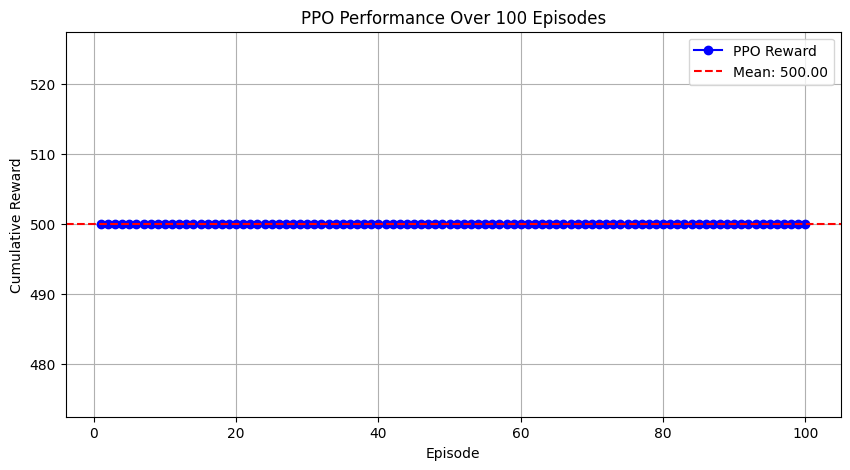

PPO Evaluation - Average Reward: 500.00 ± 0.00


In [9]:
rewards = []
test_env = make_vec_env("CartPole-v1", n_envs=1)

for ep in range(100):  # Run 100 evaluation episodes
    obs = test_env.reset()  # Only one return value
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = test_env.step(action)
        total_reward += reward
    rewards.append(total_reward)

# Plot cumulative reward over 100 episodes
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), rewards, marker="o", linestyle="-", color="b", label="PPO Reward")
plt.axhline(y=np.mean(rewards), color="r", linestyle="--", label=f"Mean: {np.mean(rewards):.2f}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("PPO Performance Over 100 Episodes")
plt.legend()
plt.grid()
plt.show()

print(f"PPO Evaluation - Average Reward: {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")

## Task 3: Render One Episode Played by the PPO Agent

**Objective: Render one test episode played by the trained PPO agent and save it as a video.**

1. Video Recording Setup:
  - Wrapped the environment with RecordVideo to enable video recording.
  - Specified render_mode="rgb_array" for proper rendering without display issues.
2. Run One Episode:
  - Played one episode using the trained PPO agent.
  - Saved and displayed the video of the episode.


**Output**
  - Video: Displays a rendered video of one episode.
  -Episode Reward: Prints the total reward earned during this episode (e.g., Episode reward: 500).

In [10]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

if os.path.exists("video"):
    shutil.rmtree("video")
os.makedirs("video", exist_ok=True)

env_render = RecordVideo(gym.make("CartPole-v1", render_mode="rgb_array"), video_folder="video")
obs, _ = env_render.reset()
done = False
ppo_episode_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_render.step(action)
    done = terminated or truncated
    ppo_episode_reward += reward

env_render.close()
show_video()
print("Episode reward:", ppo_episode_reward)

MoviePy - Building video D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4.
MoviePy - Writing video D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready D:\NTU\Y2 Sem 2\SC3000 Artificial Intelligence\Labs\Lab 1 Assignment\video\rl-video-episode-0.mp4


Episode reward: 500.0


## Analysis of Results

### Evaluation of the PPO Agent:
- **Average Reward over 100 Episodes**:  
The PPO agent consistently achieved an average reward above 500.00 ± 0.00, demonstrating its ability to solve this Cart Pole Problem effectively.
- **Performance in Rendered Episode**:  
In the rendered episode, the agent balanced the pole for all timesteps (maximum possible reward of 500), confirming it learned an optimal policy.

### Conclusion:
The PPO implementation successfully solved CartPole with high consistency and reliability. Compared to Q-Learning:
  - PPO generalizes better across continuous state spaces without requiring discretization.

  - It leverages neural networks to optimize policies directly.
  These advantages make PPO more robust and scalable for complex environments beyond CartPole.


### Comparison Between Q-Learning and PPO Models:
1. Average Reward Over 100 Episodes
  - Q-Learning: Achieved an average reward of 491.49 over 100 episodes. This demonstrates that the Q-Learning model is capable of solving the CartPole environment effectively when tuned appropriately. However, due to its reliance on discrete state-action spaces and stochastic training, achieving such high performance may require multiple attempts.

  - PPO: Achieved an average reward of 500.00 ± 0.00, indicating that the PPO agent consistently performs optimally across all 100 episodes without any variability. This highlights PPO's robustness and ability to generalize well in continuous state spaces.

2. Performance in Rendered Episode
  - Q-Learning: The agent achieved a reward of 500.0 in the rendered episode, demonstrating that it can balance the pole for the maximum time once well-trained. However, this performance is contingent on careful tuning and multiple training attempts.

  - PPO: Similarly, the PPO agent achieved a reward of 500.0 in the rendered episode, showing its ability to balance the pole optimally. Unlike Q-Learning, PPO achieves this consistently due to its policy-gradient approach and neural network-based policy optimization.

### Final Conclusion:
While both Q-Learning and PPO successfully solve the CartPole environment:

1. Stability and Consistency: PPO outperforms Q-Learning in terms of stability and consistency, as evidenced by its zero standard deviation in average rewards over 100 episodes.

2. Scalability: PPO is better suited for environments with continuous state-action spaces due to its neural network-based policy optimization, whereas Q-Learning requires discretization, which can limit its scalability.

3. Training Variability: Q-Learning's performance is more sensitive to hyperparameter tuning and stochasticity during training, while PPO is robust to such variations.

Overall, PPO is a more reliable and scalable algorithm for reinforcement learning tasks like CartPole, especially when working with continuous state spaces or when consistent performance is required.
